# Unsupervised Machine Learning

There are basically two types of ML depending on the data type we have.
- Supervised
- Unsupervised Machine learning

In supervised ML , we have labeled data , we know the correct value of inputs , 
like knowing Car prices based on features like model,style,mileage and other attributes.

Unsupervised learning - we have data that is completely unlabled. we don't know if there are any 
pattern hidden in the data., so we leave it to the algorithm to find anything it can.

Clustering is an unsupervised machine learning task.

Using a clustering algorithm means - we are giving a lot of input data but with no Label- 
and let algorithm to find any grouping in the data it can.

Those groupings are called clusters-
A cluster is a group of data points that are similar to each other based 
on their relation to surrounding data points. 

Clustering is used for - feature engineering or pattern recognization.

Types of clustering algorithms-
- Centroid-based
- Hierachical Clustering

Centroid-based : 
Centroid-based clustering is little sensitive to the initial 
parameters you give it, but it's fast and efficient.

These types of algorithms separate data points based on multiple 
centroids in the data. 

Each data point is assigned to a cluster 
based on its squared distance from the centroid. 

Example:- KMEANS clustering algorithm.

Some real world applications of clustering include fraud detection in insurance, 
, customer segmentation in marketing. 

It can also be used in larger problems, like earthquake analysis ,
city planning,anomaly detection and find outliers in  data.

K-means clustering algorithm

K-means clustering is the most commonly used clustering algorithm. 
It's a centroid-based algorithm and the simplest unsupervised learning algorithm.

This algorithm tries to minimize the variance of data points within a cluster.

K-means is best used on smaller data sets because it iterates over all of 
the data points. That means it'll take more time to classify data points if 
there are a large amount of them in the data set.

In [2]:
#import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("datasets/spending_score.csv")

In [5]:
df=data.copy()

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [10]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In centroid based algo - it associated with centroid. The main idea is to reduce the 
distance between the data point and respective cluster centroid.
W.r.to no. of iteration the centroid shift it position repetead until the best position(Min SSE)

 objective:- to cluster customers in different groups based on
 - Annual income 
 - Spending score

# Kmeans algorithm - centroid based

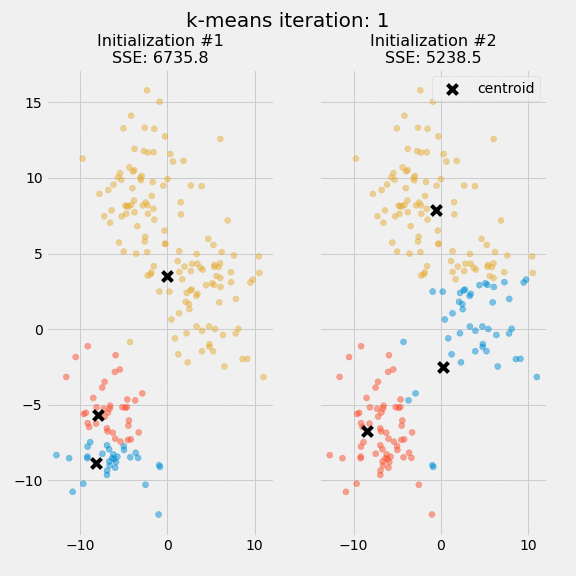

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmean_cluster=KMeans(n_clusters=4,max_iter=100)

In [15]:
kmean_cluster.fit(X)

KMeans(max_iter=100, n_clusters=4)

In [16]:
kmean_cluster.inertia_

73679.78903948836

In [17]:
# to find the effective value of k ( no. of cluster) plot a graph

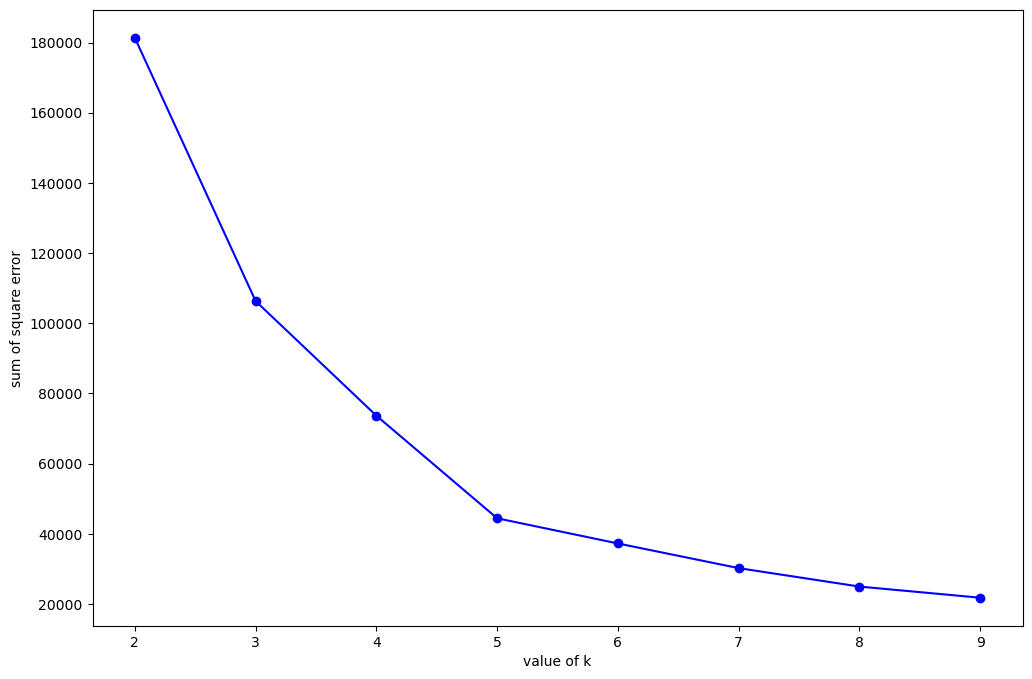

In [19]:
SSE=[]
for i in range(2,10):
    KM=KMeans(n_clusters=i,max_iter=300)
    KM.fit(X)
    SSE.append(KM.inertia_)
    

plt.figure(figsize=(12,8))
plt.plot(range(2,10),SSE,color="b",marker="o")
plt.xlabel("value of k")
plt.ylabel("sum of square error")
plt.show()

In [21]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 5.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


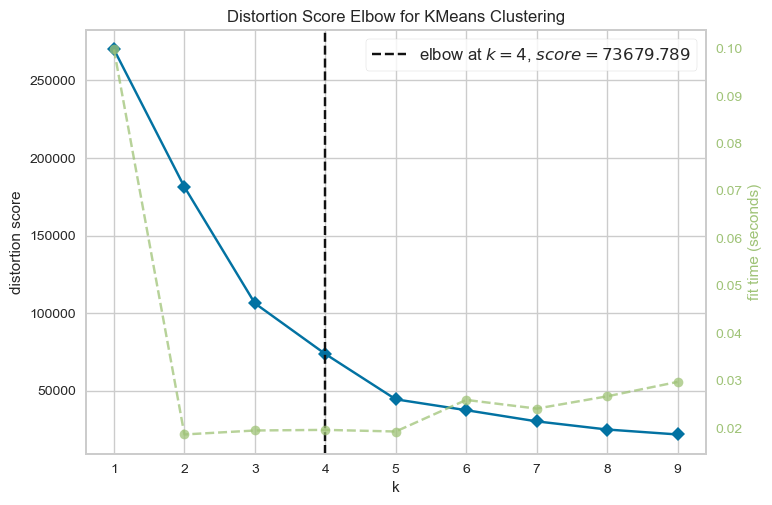

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10)).fit(X)
visualizer.show()

In [24]:
# Taking 5 no. of clusters
km1=KMeans(n_clusters=5)
km1.fit(X)
# predicting the label of input data
y=km1.predict(X)
# adding the label to a column name "label"
df["label"]=y
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [25]:
df["label"].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: label, dtype: int64

In [ ]:
# create a scatterplot as per label/clusters

Text(0.5, 0, 'Annual income')

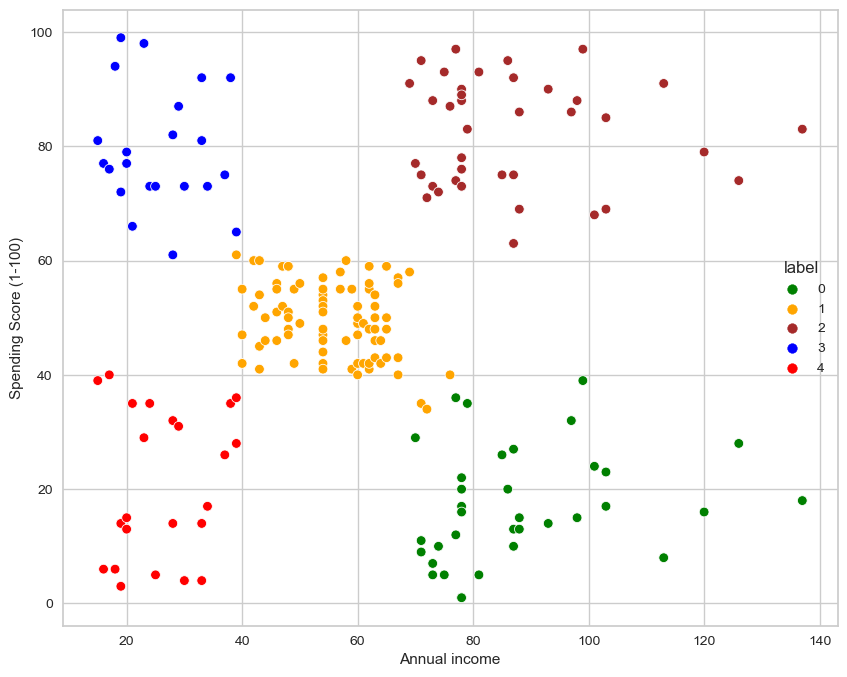

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",
                hue="label",palette=["green","orange","brown","blue","red"],data=df,legend="full")
plt.xlabel("Annual income")

In [27]:
cust1=df[df["label"]==1]
print("person in group 1 \n",cust1["CustomerID"])
len(cust1)

person in group 1 
 43      44
46      47
47      48
48      49
49      50
      ... 
121    122
122    123
126    127
132    133
142    143
Name: CustomerID, Length: 81, dtype: int64


81

# Evaluation of custers- silhouette index

silhouette index- is the evaluation matrix range(-1 to 1)
- Value near 1 considered as best clustering.
- the score near -1 is considered as wrost cluster
- score near 0 signifies overlapping clusters.

In [28]:
labels=km1.labels_

In [29]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
print( "the silhoutte index :", silhouette_score(X,labels))

the silhoutte index : 0.553931997444648


In [ ]:
# Evaluation of custers- Davies Bouldin index- difference in average similarity measure of each cluster

In [ ]:
# DBI  start with 0 - lower the value better the cluster

In [32]:
from sklearn.metrics import davies_bouldin_score

In [33]:
dbs=davies_bouldin_score(X,labels)
dbs

0.5725628995597086

# Hierarchical clustering

In [ ]:
#Dendrogram- tree diagram create the relationship between similar set of data
# clad are arranged according to the similarlity in pattern of data.

In [38]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# Dendrogram -- scipy.cluster

In [39]:
import scipy.cluster.hierarchy as shc

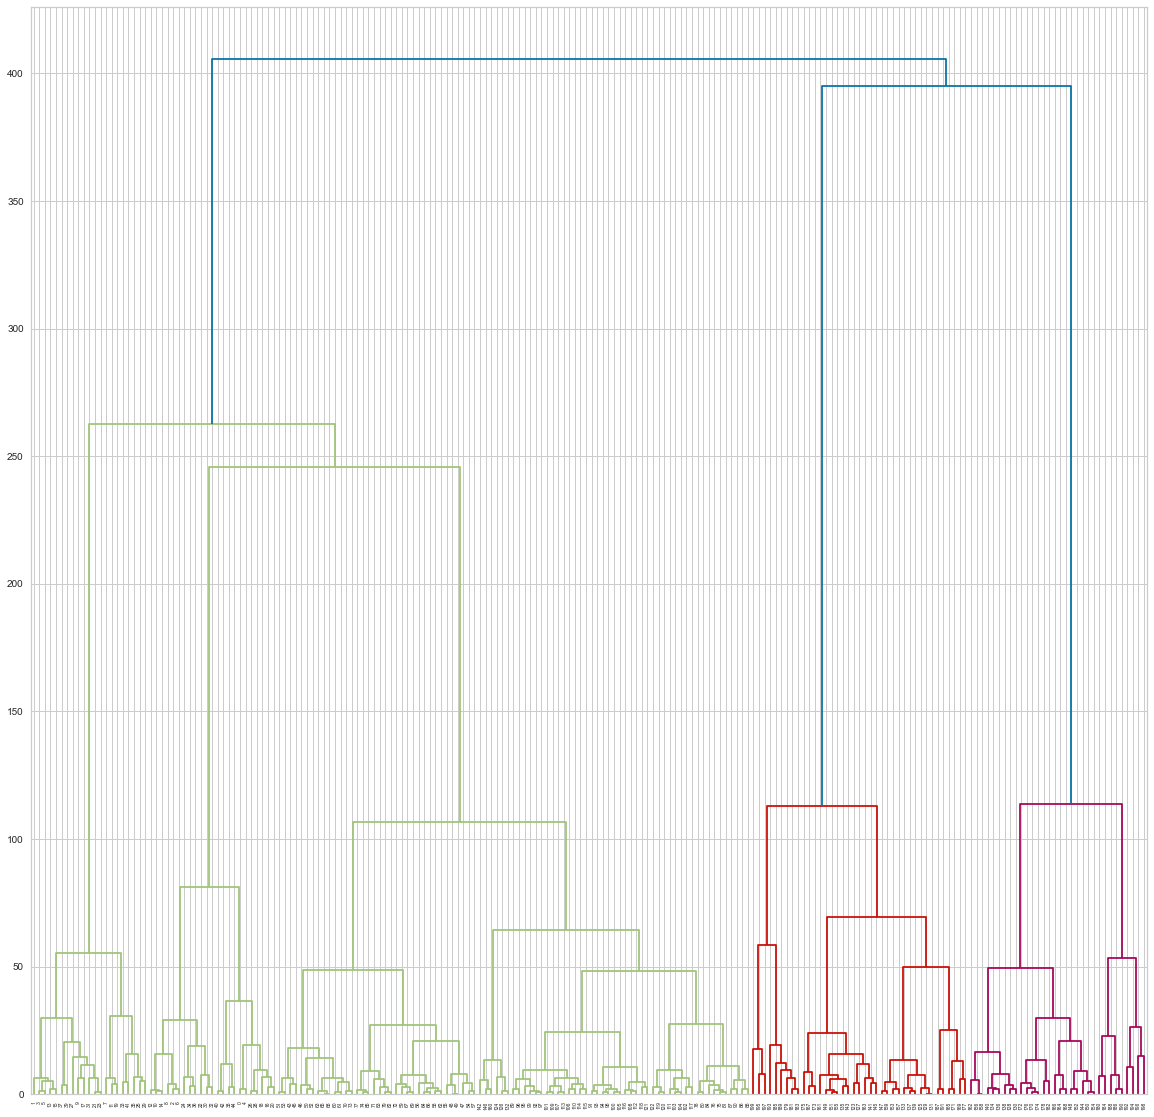

In [40]:
plt.figure(figsize=(20,20))
dend=shc.dendrogram(shc.linkage(X,method="ward"))

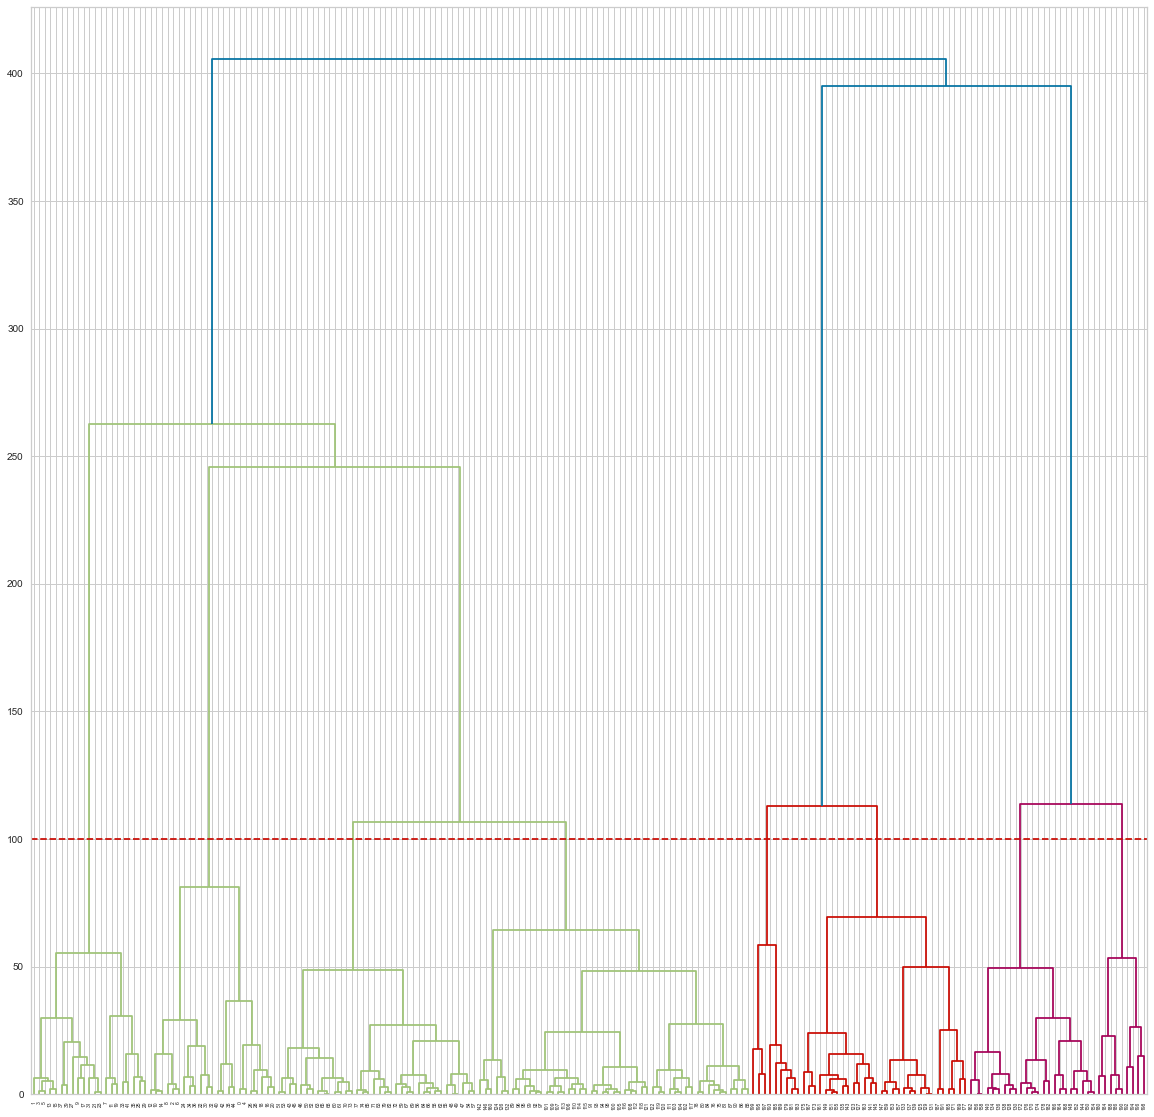

In [41]:
plt.figure(figsize=(20,20))
dend=shc.dendrogram(shc.linkage(X,method="ward"))
plt.axhline(y=100,color="r",linestyle="--")

In [ ]:
# Agglomerative clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
cluster=AgglomerativeClustering(n_clusters=5,linkage="ward")
cluster.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [48]:
y1=cluster.fit_predict(X)
df["label_Agg"]=y1
df.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label,label_Agg
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,2,4
...,...,...,...,...,...,...,...
95,96,Male,24,60,52,4,1
96,97,Female,47,60,47,4,1
97,98,Female,27,60,50,4,1
98,99,Male,48,61,42,4,1


In [49]:
df["label_Agg"].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: label_Agg, dtype: int64

In [52]:
#Result of KMEANS METHOD
cust1=df[df["label"]==1]
print("person in group 1 \n",cust1["CustomerID"])
len(cust1)

person in group 1 
 1      2
3      4
5      6
7      8
9     10
11    12
13    14
15    16
17    18
19    20
21    22
23    24
25    26
27    28
29    30
31    32
33    34
35    36
37    38
39    40
41    42
45    46
Name: CustomerID, dtype: int64


22

In [53]:
#AgglomerativeClustering METHOD
cust3=df[df["label_Agg"]==3]
print("person in group 1 \n",cust3["CustomerID"])
len(cust3)

person in group 1 
 1      2
3      4
5      6
7      8
9     10
11    12
13    14
15    16
17    18
19    20
21    22
23    24
25    26
27    28
29    30
31    32
33    34
35    36
37    38
39    40
41    42
Name: CustomerID, dtype: int64


21

In [54]:
# silhouette index
labels1=cluster.labels_
silhouette_score(X,labels1)

0.5529945955148897